# 曾正豪 0716325

In [1]:
import csv
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils import shuffle
from scipy.sparse import coo_matrix
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
x = []
y = []
data_freq = []
data_freq_e = []
data_freq_p = []

for idx in range(21):
    data_freq.append(defaultdict(int))
    data_freq_e.append(defaultdict(int))
    data_freq_p.append(defaultdict(int))

with open('agaricus-lepiota.data', newline='') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        y.append(row[0])
        x.append(row[1:11])
        x[-1].extend(row[12:23])

        for idx in range(21):
            data_freq[idx][x[-1][idx]] = 0
            data_freq_e[idx][x[-1][idx]] = 0
            data_freq_p[idx][x[-1][idx]] = 0
    
    for i in range(len(x)):
        if y[i] == 'e':
            for idx in range(21):
                data_freq_e[idx][x[i][idx]] += 1
        if y[i] == 'p':
            for idx in range(21):
                data_freq_p[idx][x[i][idx]] += 1
        for idx in range(21):
            data_freq[idx][x[i][idx]] += 1
            x[i][idx] = ord(x[i][idx]) - ord('a')

x = np.array(x)
y = np.array(y)

X_sparse = coo_matrix(x)
x, X_sparse, y = shuffle(x, X_sparse, y, random_state=9989)

# Data Input & Data Preprocessing

## Data Input
    這邊由於dataset檔案內容符合csv格式，所以我這邊使用了csv這個module來去讀取dataset，並且我使用了data_freq、data_freq_e、data_freq_p這三個變數來儲存每一個feature在不同label下的出現頻率

## Data Preprocessing

### Drop features with any missing value.
    這邊因為可以提前知道第11項feature是有missing value的，所以在讀取資料的時候直接不讀取第11項
### Transform data format and shape so your model can process them.
    使用了np.array()將其轉變為numpy array形式
### Shuffle the data.
    這邊使用了sklearn.utils裡面的shuffle函示來打亂

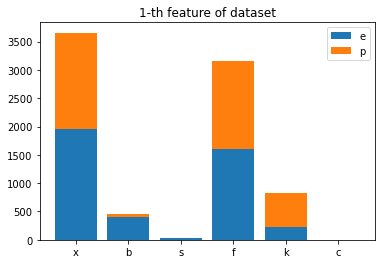

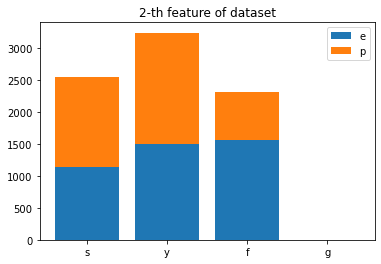

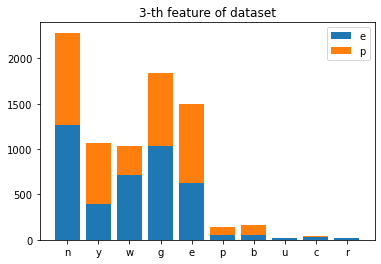

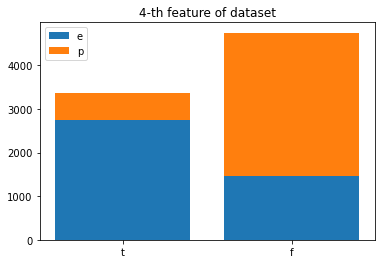

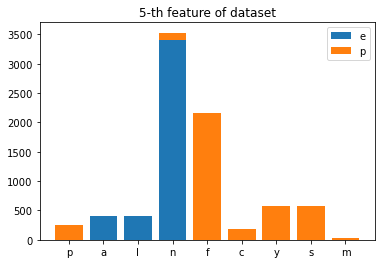

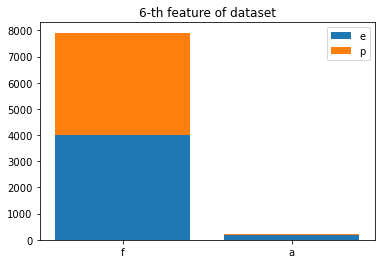

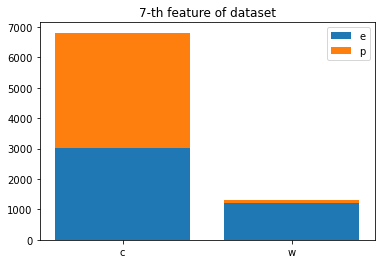

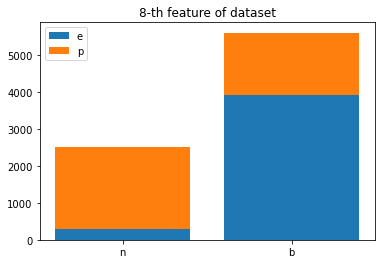

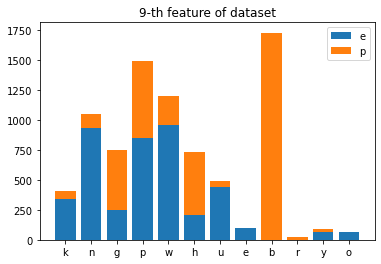

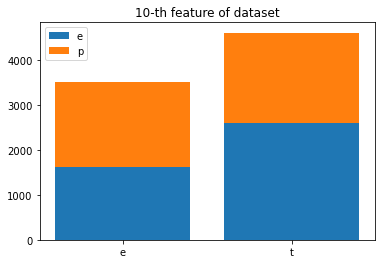

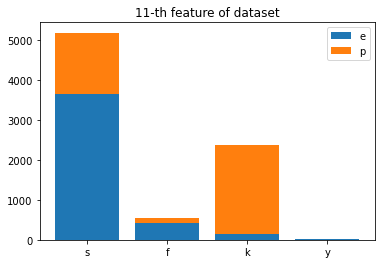

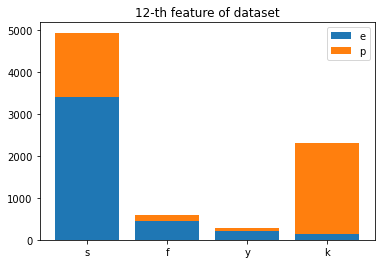

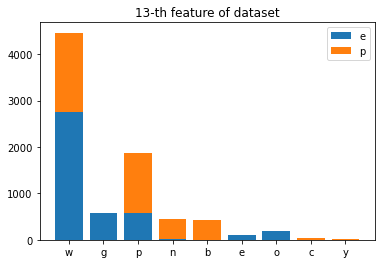

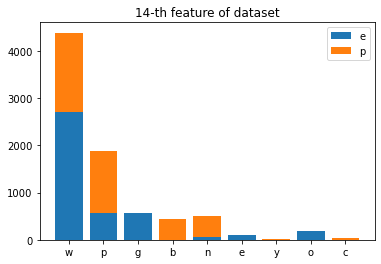

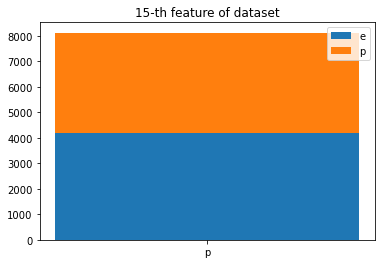

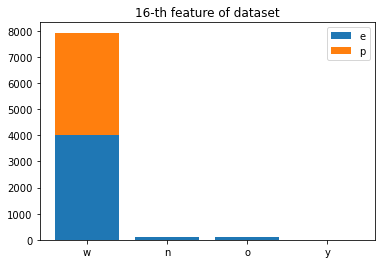

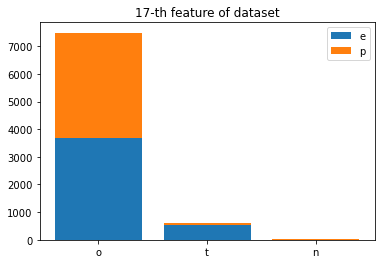

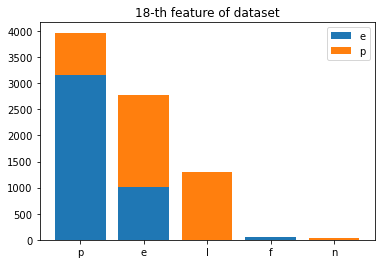

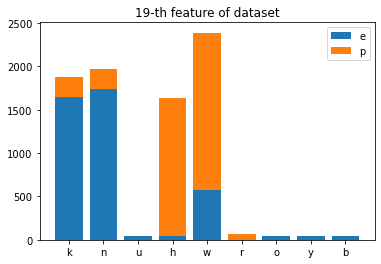

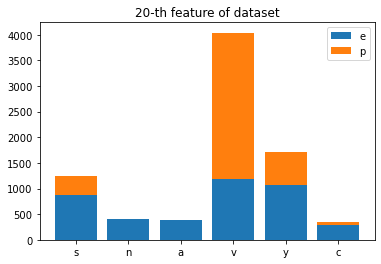

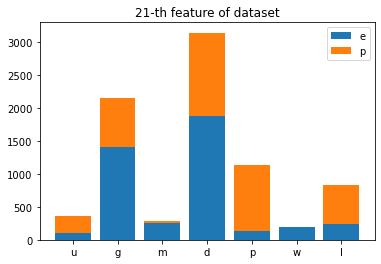

In [3]:
for idx in range(21):
    tolist = data_freq[idx].items()
    tolist_e = data_freq_e[idx].items()
    tolist_p = data_freq_p[idx].items()

    i, j = zip(*tolist) 
    i_e, j_e = zip(*tolist_e) 
    i_p, j_p = zip(*tolist_p) 

    plt.title(str(idx+1) + '-th feature of dataset')
    plt.bar(i_e, j_e, label='e')
    plt.bar(i_p, j_p, label='p', bottom=j_e)
    plt.legend()
    plt.show()
        

# Data Visualization
    這邊我將兩種label的各個feature分布使用長條圖印出來

# Model Construction & Train-Test-Split & Results


C:\Users\banne2266.cs07\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


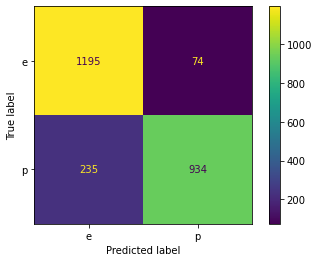

              precision    recall  f1-score   support

           e       0.84      0.94      0.89      1269
           p       0.93      0.80      0.86      1169

    accuracy                           0.87      2438
   macro avg       0.88      0.87      0.87      2438
weighted avg       0.88      0.87      0.87      2438



In [4]:
without_laplace = MultinomialNB(alpha=0.0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=777)
without_laplace.fit(X_train, y_train)
y_pred = without_laplace.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=without_laplace.classes_).plot()
report = classification_report(y_test, y_pred)
plt.show()
print(report)

## Naïve Bayes Without Laplace smoothing & Holdout validation
### Model Construction
    這邊我使用了sklearn.naive_bayes裡面的MultinomialNB，並將alpha設為0來做出沒有Laplace smoothing的Naïve Bayes model。
### Train-Test-Split
    接著我使用sklearn.model_selection的train_test_split來將dataset以7:3的比例分為訓練集和測試集。並使用model的fit函數去訓練訓練集，predict函數去預測測試集。
### Results 
    使用sklearn.metrics的confusion_matrix去自動生成Confusion matrix，並且使用ConfusionMatrixDisplay印出。接著使用sklearn.metrics的classification_report去將測試集預測結果的分析資料印出

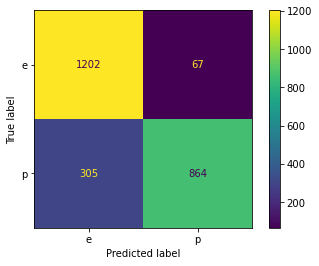

              precision    recall  f1-score   support

           e       0.80      0.95      0.87      1269
           p       0.93      0.74      0.82      1169

    accuracy                           0.85      2438
   macro avg       0.86      0.84      0.84      2438
weighted avg       0.86      0.85      0.85      2438



In [5]:
with_laplace = MultinomialNB(alpha=1000000)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=777)
with_laplace.fit(X_train, y_train)
y_pred = with_laplace.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=with_laplace.classes_).plot()
plt.show()
print(report)



## Naïve Bayes With Laplace smoothing & Holdout validation
### Model Construction
    這邊我使用了sklearn.naive_bayes裡面的MultinomialNB，並將alpha設為10000000來做出有Laplace smoothing的Naïve Bayes model。
### Train-Test-Split
    接著我使用sklearn.model_selection的train_test_split來將dataset以7:3的比例分為訓練集和測試集。並使用model的fit函數去訓練訓練集，predict函數去預測測試集。
### Results 
    使用sklearn.metrics的confusion_matrix去自動生成Confusion matrix，並且使用ConfusionMatrixDisplay印出。接著使用sklearn.metrics的classification_report去將測試集預測結果的分析資料印出

C:\Users\banne2266.cs07\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\banne2266.cs07\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\banne2266.cs07\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


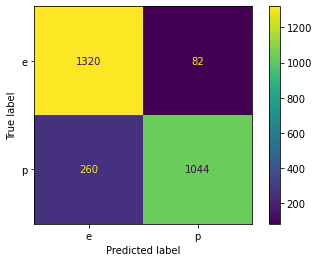

              precision    recall  f1-score   support

           e       0.84      0.94      0.88      4208
           p       0.93      0.80      0.86      3916

    accuracy                           0.87      8124
   macro avg       0.88      0.87      0.87      8124
weighted avg       0.88      0.87      0.87      8124



In [6]:
kf = KFold(n_splits=3)
kf.get_n_splits(x)
without_laplace = MultinomialNB(alpha=0.0)

true_class = []
pred_class = []
CM_list = np.zeros((2,2)).astype(int)


for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    without_laplace.fit(X_train, y_train)
    y_pred = without_laplace.predict(X_test)

    true_class.extend(y_test)
    pred_class.extend(y_pred)

    CM = confusion_matrix(y_test, y_pred)
    CM_list += CM
    
CM_list = CM_list // 3
report = classification_report(true_class, pred_class)
ConfusionMatrixDisplay(confusion_matrix=CM_list, display_labels=without_laplace.classes_).plot()
plt.show()
print(report)




## Naïve Bayes Without Laplace smoothing & K-fold cross-validation
### Model Construction
    這邊我使用了sklearn.naive_bayes裡面的MultinomialNB，並將alpha設為0來做出沒有Laplace smoothing的Naïve Bayes model。
### Train-Test-Split
    接著我使用sklearn.model_selection的KFold來將dataset以K=3的方式做出K-fold cross-validation。
    並在每一輪當中，使用model的fit函數去訓練訓練集，predict函數去預測測試集。
### Results 
    使用sklearn.metrics的confusion_matrix去自動生成Confusion matrix，並且使用ConfusionMatrixDisplay印出。接著使用sklearn.metrics的classification_report去將測試集預測結果的分析資料印出

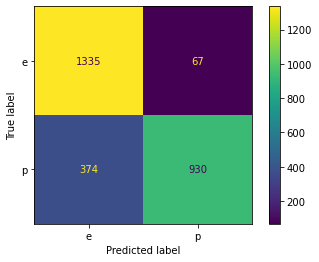

              precision    recall  f1-score   support

           e       0.78      0.95      0.86      4208
           p       0.93      0.71      0.81      3916

    accuracy                           0.84      8124
   macro avg       0.86      0.83      0.83      8124
weighted avg       0.85      0.84      0.83      8124



In [7]:
kf = KFold(n_splits=3)
kf.get_n_splits(x)
with_laplace = MultinomialNB(alpha=1000000)

true_class = []
pred_class = []
CM_list = np.zeros((2,2)).astype(int)

for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    with_laplace.fit(X_train, y_train)
    y_pred = with_laplace.predict(X_test)

    true_class.extend(y_test)
    pred_class.extend(y_pred)

    CM = confusion_matrix(y_test, y_pred)
    CM_list += CM

CM_list = CM_list // 3
report = classification_report(true_class, pred_class)
ConfusionMatrixDisplay(confusion_matrix=CM_list, display_labels=with_laplace.classes_).plot()
plt.show()
print(report)


## Naïve Bayes With Laplace smoothing & K-fold cross-validation
### Model Construction
    這邊我使用了sklearn.naive_bayes裡面的MultinomialNB，並將alpha設為0來做出沒有Laplace smoothing的Naïve Bayes model。
### Train-Test-Split
    接著我使用sklearn.model_selection的KFold來將dataset以K=3的方式做出K-fold cross-validation。
    並在每一輪當中，使用model的fit函數去訓練訓練集，predict函數去預測測試集。
### Results 
    使用sklearn.metrics的confusion_matrix去自動生成Confusion matrix，並且使用ConfusionMatrixDisplay印出。接著使用sklearn.metrics的classification_report去將測試集預測結果的分析資料印出

# Comparison & Conclusion

    針對使用Holdout validation以及K-fold cross-validation做比較，可以發現在其他條件相同的情況下，Holdout validation的準確率與K-fold cross-validation平均的準確率是差不多的，猜測應該是因為事前有做shuffle，以及兩者的測試集大小差不多(30%以及33%)的緣故

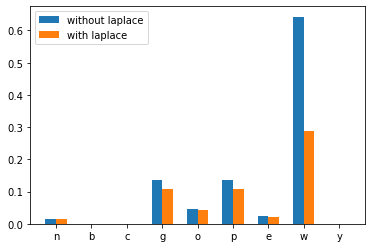

In [14]:
k = 1
NY = 0
tau = {'n':0, 'b':0, 'c':0, 'g':0, 'o':0, 'p':0, 'e':0, 'w':0, 'y':0}
NX = {'n':0, 'b':0, 'c':0, 'g':0, 'o':0, 'p':0, 'e':0, 'w':0, 'y':0}

for idx in range(len(x)):
    if y[idx] == 'e':
        NY += 1
        temp = chr(x[idx][13] + ord('a'))
        NX[ temp ] += 1
    tau[ temp ] += 1

P = {}
for idx in NX:
    P[idx] = NX[idx] / NY
P = P.items()
i, j = zip(*P) 


P_l = {}
for idx in NX:
    P_l[idx] = (NX[idx] + k) / (NY + k * tau[idx])
P_l = P_l.items()
i_l, j_l = zip(*P_l) 


x_label = np.arange(len(i))
plt.bar(x_label, j, 0.3, label='without laplace')
plt.bar(x_label+0.3, j_l, 0.3, label='with laplace')
plt.xticks(x_label + 0.3 / 2, i)
plt.legend()
plt.show()


# Questions 
## with Laplace smoothing:

$$ P(X_{𝑠𝑡𝑎𝑙𝑘−𝑐𝑜𝑙𝑜𝑟−𝑏𝑒𝑙𝑜𝑤−𝑟𝑖𝑛𝑔} | Y = e) =  \frac {N(X_{𝑠𝑡𝑎𝑙𝑘−𝑐𝑜𝑙𝑜𝑟−𝑏𝑒𝑙𝑜𝑤−𝑟𝑖𝑛𝑔} | Y = e) + k} {N(Y = e) + k\tau} $$

## without Laplace smoothing:

$$ P(X_{𝑠𝑡𝑎𝑙𝑘−𝑐𝑜𝑙𝑜𝑟−𝑏𝑒𝑙𝑜𝑤−𝑟𝑖𝑛𝑔} | Y = e) =  \frac {N(X_{𝑠𝑡𝑎𝑙𝑘−𝑐𝑜𝑙𝑜𝑟−𝑏𝑒𝑙𝑜𝑤−𝑟𝑖𝑛𝑔} | Y = e)} {N(Y = e)} $$


就直接照公式計算得出，並繪製於圖表上